In [430]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
from scipy.integrate import odeint
import pandas as pd
import seaborn
from scipy import stats

In [431]:
df = pd.read_csv('AllResistanceGenesizetaxonomy.csv')

In [432]:
print(np.size(df,0))#.Antimicrobial_resistance_chromosome[i]

34688


In [433]:
ARGChro=np.zeros(np.size(df,0))
BioChro=np.zeros(np.size(df,0))
ARGPlas=np.zeros(np.size(df,0))
BioPlas=np.zeros(np.size(df,0))
PlasTotal=np.zeros(np.size(df,0))
ChroSize=np.zeros(np.size(df,0))
PlasNum=np.zeros(np.size(df,0))
GenomeSize=np.zeros(np.size(df,0))
for i in range(np.size(df,0)):
    ARGChro[i]=df.Antimicrobial_resistance_chromosome[i]
    BioChro[i]=df.biofilm_chromosome[i]
    ARGPlas[i]=df.Antimicrobial_resistance_plasmid[i]
    BioPlas[i]=df.biofilm_plasmid[i]
    PlasTotal[i]=df.plasmid_total_size[i]
    PlasNum[i]=df.plasmid_count[i]
    ChroSize[i]=df.chromosome_size[i]
    GenomeSize[i]=ChroSize[i]+PlasTotal[i]

In [434]:
PP0ChroSize=[]
PP0GenomeSize=[]
PP1ChroSize=[]
PP1GenomeSize=[]
for i in range(len(BioChro)):
    if BioChro[i]+BioPlas[i]==0:
        PP0ChroSize.append(ChroSize[i])
        PP0GenomeSize.append(ChroSize[i]+PlasTotal[i])
    else:
        PP1ChroSize.append(ChroSize[i])
        PP1GenomeSize.append(ChroSize[i]+PlasTotal[i])

t-stat: -68.40   pval: 0.0000


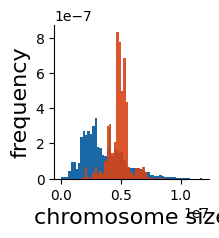

In [435]:
plt.figure(figsize=(2,2))
plt.hist(PP0ChroSize, bins=np.arange(0,1.2,0.02)*10**7, alpha=0.9, color='#01579B', edgecolor='none',density='True')
plt.hist(PP1ChroSize, bins=np.arange(0,1.2,0.02)*10**7, alpha=0.9, color='#D84315', edgecolor='none',density='True')
tstat, pval = stats.ttest_ind(a=PP0ChroSize, b=PP1ChroSize, alternative="two-sided")
print("t-stat: {:.2f}   pval: {:.4f}".format(tstat, pval))
plt.xlabel('chromosome size',fontsize=16)
plt.ylabel('frequency',fontsize=16)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.savefig('AllResistanceGenes_1.pdf')
plt.show()

t-stat: -68.40   pval: 0.0000


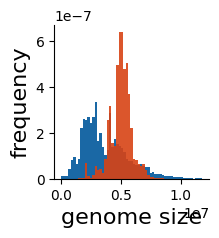

In [436]:
plt.figure(figsize=(2,2))
plt.hist(PP0GenomeSize, bins=np.arange(0,1.2,0.02)*10**7, alpha=0.9, color='#01579B', edgecolor='none',density='True')
plt.hist(PP1GenomeSize, bins=np.arange(0,1.2,0.02)*10**7, alpha=0.9, color='#D84315', edgecolor='none',density='True')
tstat, pval = stats.ttest_ind(a=PP0ChroSize, b=PP1ChroSize, alternative="two-sided")
print("t-stat: {:.2f}   pval: {:.4f}".format(tstat, pval))
plt.xlabel('genome size',fontsize=16)
plt.ylabel('frequency',fontsize=16)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.savefig('AllResistanceGenes_2.pdf')
plt.show()

In [443]:
print(10**0.01)

1.023292992280754


In [438]:
wid=0.01
PlasmidRatio_0=[]
PlasmidRatio_1=[]
GenomeSize_0=[]
GenomeSize_1=[]
PlasNum_0=[]
PlasNum_1=[]

DNum_0=[]
DNum_1=[]

ii=0
for range_left in np.arange(np.log10(np.min(GenomeSize)),np.log10(np.max(GenomeSize)),wid):
    ii=ii+1
    print(ii)
    range_right=range_left+wid
    x00=0
    x01=0
    x10=0
    x11=0

    PP0ChroSize=[]
    PP0PlasNum=[]
    PP0GenomeSize=[]
    PP1ChroSize=[]
    PP1PlasNum=[]
    PP1GenomeSize=[]

    for i in range(len(BioChro)):
        if BioChro[i]+BioPlas[i]==0 and GenomeSize[i]>10**range_left and GenomeSize[i]<10**range_right:
            PP0ChroSize.append(ChroSize[i])
            PP0GenomeSize.append(ChroSize[i]+PlasTotal[i])
            PP0PlasNum.append(PlasNum[i])
            if PlasTotal[i]==0:
                x00=x00+1
            else:
                x01=x01+1
        if BioChro[i]+BioPlas[i]>0 and GenomeSize[i]>10**range_left and GenomeSize[i]<10**range_right:
            PP1ChroSize.append(ChroSize[i])
            PP1GenomeSize.append(ChroSize[i]+PlasTotal[i])
            PP1PlasNum.append(PlasNum[i])
            if PlasTotal[i]==0:
                x10=x10+1
            else:
                x11=x11+1
    if x00+x01>200 and x10+x11>200:
        PlasmidRatio_0.append(x01/(x00+x01))
        PlasmidRatio_1.append(x11/(x10+x11))
        GenomeSize_0.append(np.mean(PP0GenomeSize))
        GenomeSize_1.append(np.mean(PP1GenomeSize))
        PlasNum_0.append(np.mean(PP0PlasNum))
        PlasNum_1.append(np.mean(PP1PlasNum))
        DNum_0.append(x00+x01)
        DNum_1.append(x10+x11)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216


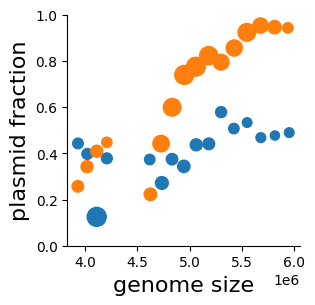

In [439]:
plt.figure(figsize=(3,3))
plt.scatter(GenomeSize_0, PlasmidRatio_0,s=np.divide(DNum_0,5))
plt.scatter(GenomeSize_1, PlasmidRatio_1,s=np.divide(DNum_1,5))
#plt.xscale('log')
plt.xlabel('genome size',fontsize=16)
plt.ylabel('plasmid fraction',fontsize=16)
plt.ylim(0,1)
#plt.xlim(3.8*10**6,6*10**6)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.savefig('AllResistanceGenes_3.pdf')
plt.show()


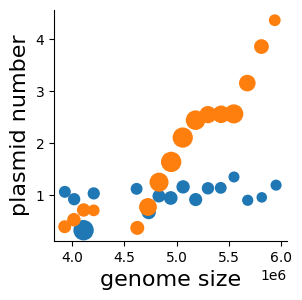

In [440]:
plt.figure(figsize=(3,3))
plt.scatter(GenomeSize_0, PlasNum_0,s=np.divide(DNum_0,5))
plt.scatter(GenomeSize_1, PlasNum_1,s=np.divide(DNum_1,5))
#plt.xscale('log')
plt.xlabel('genome size',fontsize=16)
plt.ylabel('plasmid number',fontsize=16)
#plt.ylim(0,1)
#plt.xlim(3.8*10**6,6*10**6)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.savefig('AllResistanceGenes_4.pdf')
plt.show()

In [441]:
wid=0.01

DNum_0=[]
DNum_1=[]
GenomeSizeM=[]

ii=0
for range_left in np.arange(np.log10(np.min(GenomeSize)),np.log10(np.max(GenomeSize)),wid):
    ii=ii+1
    print(ii)
    range_right=range_left+wid
    x00=0
    x01=0
    x10=0
    x11=0
    GenomeSizet=[]

    for i in range(len(BioChro)):
        if BioChro[i]+BioPlas[i]==0 and GenomeSize[i]>10**range_left and GenomeSize[i]<10**range_right:
            GenomeSizet.append(ChroSize[i]+PlasTotal[i])
            if PlasTotal[i]==0:
                x00=x00+1
            else:
                x01=x01+1
        if BioChro[i]+BioPlas[i]>0 and GenomeSize[i]>10**range_left and GenomeSize[i]<10**range_right:
            GenomeSizet.append(ChroSize[i]+PlasTotal[i])
            if PlasTotal[i]==0:
                x10=x10+1
            else:
                x11=x11+1
    if x00+x01>0 and x10+x11>0:
        DNum_0.append(x00+x01)
        DNum_1.append(x10+x11)
        GenomeSizeM.append(np.mean(GenomeSizet))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216


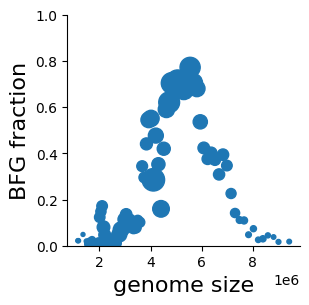

In [442]:
plt.figure(figsize=(3,3))
plt.scatter(GenomeSizeM, np.divide(DNum_1,np.add(DNum_1,DNum_0)),s=np.add(DNum_1,DNum_0)/5)
#plt.xscale('log')
plt.xlabel('genome size',fontsize=16)
plt.ylabel('BFG fraction',fontsize=16)
plt.ylim(0,1)
#plt.xlim(3.8*10**6,6*10**6)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.savefig('AllResistanceGenes_5.pdf')
plt.show()